# Polynomial regression: particular case of multiple linear regression models
We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:
Quadratic - 2nd order :𝑌=𝑎+𝑏1𝑋+𝑏2𝑋2
Cubic - 3rd order :𝑌=𝑎+𝑏1𝑋+𝑏2𝑋2+𝑏3𝑋3
Higher order: 𝑌=𝑎+𝑏1𝑋+𝑏2𝑋2+𝑏3𝑋3....


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\kaout\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')
pd.set_option('display.max_columns', 29)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


### Polynomial transform on single feature:

In [3]:
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [17]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit ')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)

    plt.show()
    plt.close()

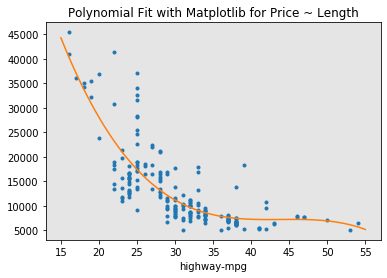

In [5]:
PlotPolly(p, x, y, 'highway-mpg')
#We can already see from plotting that this polynomial model performs better than the linear model.
#This is because the generated polynomial function "hits" more of the data points.

for a second order: $$ Y = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2 $$

       2
45.35 x - 3773 x + 8.419e+04


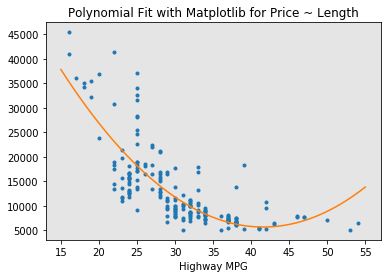

In [6]:
f1 = np.polyfit(x, y, 2)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

### Polynomial transform on multiple features:

In [7]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [8]:
Z_pr=pr.fit_transform(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [43]:
print("Original data shape:",df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']].shape,"\nAfter the transformation data shape",Z_pr.shape)

Original data shape: (201, 4) 
After the transformation data shape (201, 15)


# Turn it to Linear Regression problem:

In [11]:
from sklearn.linear_model import LinearRegression

In [15]:
lm=LinearRegression()
train_y=lm.fit(Z_pr,y)
print ('Coefficients: ', lm.coef_)
print ('Intercept: ',lm.intercept_)

Coefficients:  [ 0.00000000e+00  3.79990747e+02  9.53081616e+00 -1.06265103e+02
  1.82168928e+02  1.69423474e+00 -1.86864385e-01 -1.29043091e+00
 -2.14860065e+00  7.57100954e-04  1.11910005e-01 -1.92007463e-01
  8.95252693e-02  4.23869258e-02  4.66019878e+00]
Intercept:  -21262.848277367608


In [16]:
from sklearn.metrics import r2_score

test_y = lm.predict(Z_pr)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , y) )

Mean absolute error: 2156.41
Residual sum of squares (MSE): 9656613.40
R2-score: 0.82


# Pipeline :
<p>Data Pipelines simplify the steps of processing the data.</p>

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding  constructor.

In [47]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# pipeline constructor
pipe=Pipeline(Input)
# fit the model
pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [48]:
#we can normalize the data, perform a transform and produce a prediction simultaneously
ypipe=pipe.predict(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [51]:
y[0:4].values

array([13495., 16500., 16500., 13950.])

# R-squared:
 the model with the higher R-squared value is a better fit for the data.

In [53]:
from sklearn.metrics import r2_score
print('The R-square value is: ', r2_score(y, p(x)))

The R-square value is:  0.674194666390652


In [54]:
print('The R-square value is: ', r2_score(y, p1(x)))

The R-square value is:  0.6517936037026724


# Mean Squared Error:
When comparing models, the model with the smallest MSE value is a better fit for the data.

In [57]:
from sklearn.metrics import mean_squared_error

print("The mean square error of the polynomial fit p is",mean_squared_error(y, p(x)))

The mean square error of the polynomial fit p is 20474146.426361218


In [58]:
print("The mean square error of the polynomial fit p1 is",mean_squared_error(y, p1(x)))

The mean square error of the polynomial fit p1 is 21881866.283181358


In [18]:
np.linspace(12,55,10)

array([12.        , 16.77777778, 21.55555556, 26.33333333, 31.11111111,
       35.88888889, 40.66666667, 45.44444444, 50.22222222, 55.        ])

# linear model

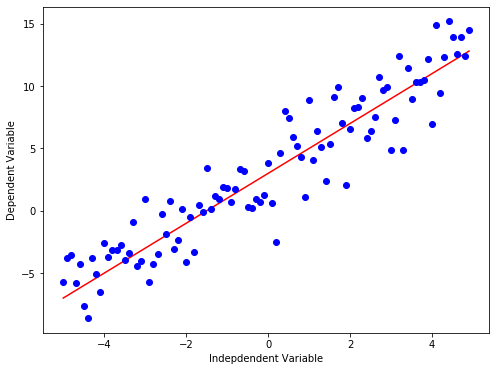

In [30]:
x = np.arange(-5.0, 5.0, 0.1)
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.figure(figsize=(8,6))
plt.plot(x,y, 'r') 
plt.plot(x, ydata,'bo')

plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Non linear model

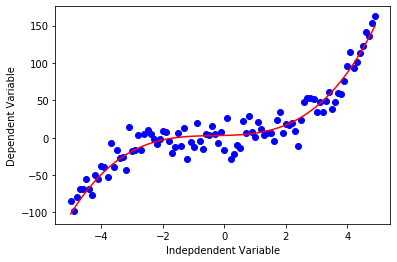

In [36]:
# Cubic function:
x = np.arange(-5.0, 5.0, 0.1)
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 15 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

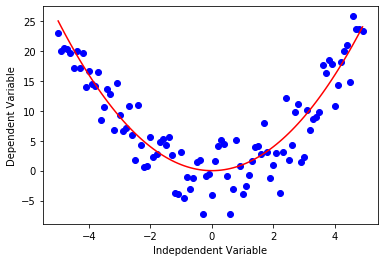

In [39]:
# Quadratic function
x = np.arange(-5.0, 5.0, 0.1)
y = np.power(x,2)
y_noise = 3 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

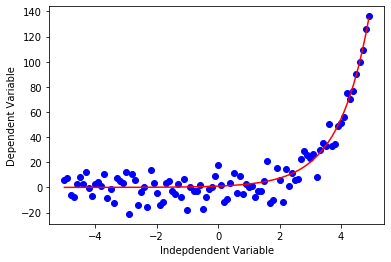

In [43]:
# Exponentiel function
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x)
y_noise = 10 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

C:\Users\kaout\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


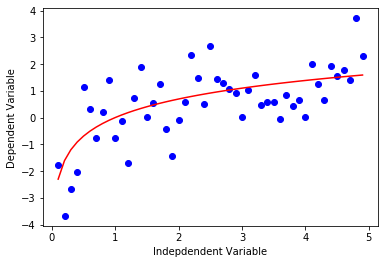

In [45]:
#Logarithmic function
x = np.arange(-5.0, 5.0, 0.1)
y = np.log(x)
y_noise = 1 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

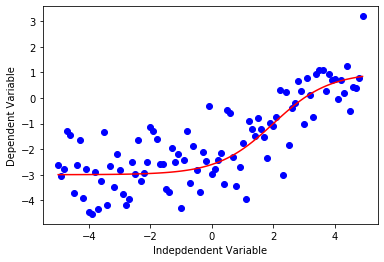

In [51]:
#Logistic function:
x = np.arange(-5.0, 5.0, 0.1)
y = 1-4/(1+np.power(3,x-2))
y_noise = 1 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [53]:
data=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv")
data.head(2)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10


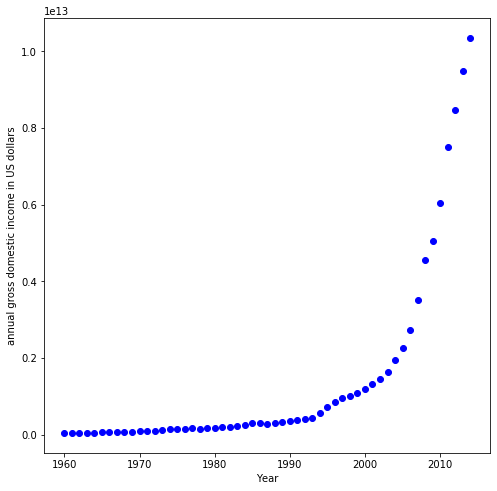

In [56]:
plt.figure(figsize=(8,8))
plt.plot(data["Year"].values, data["Value"].values,'bo')
plt.xlabel("Year")
plt.ylabel("annual gross domestic income in US dollars")
plt.show()

In [61]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

#### find the best parameters for our fit line?
we can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data.

In [66]:
# Lets normalize our data
xdata =data["Year"].values/max(data["Year"].values)
ydata =data["Value"].values/max(data["Value"].values)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 =", popt[0] ,"\nbeta_2 =",popt[1])

 beta_1 = 690.4517109968472 
beta_2 = 0.9972071272536187


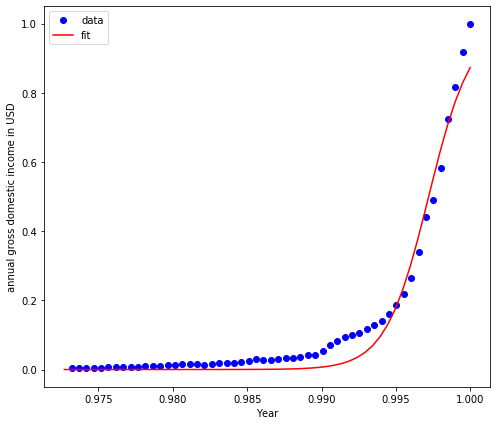

In [70]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,7))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'bo', label='data')
plt.plot(x,y, 'r', label='fit')
plt.legend(loc='best')
plt.ylabel('annual gross domestic income in USD')
plt.xlabel('Year')
plt.show()

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xdata,ydata , test_size=0.2, random_state=42)
popt, pcov = curve_fit(sigmoid, X_train, y_train)
y_pred = sigmoid(X_test, *popt)

#Evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred- y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_pred , y_test) )



Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.98
